# Food Delivery

## Team 5

### Tara Dehdari, Nishok Narayanan, Muris Saab

## Imports

In [26]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns

import matplotlib.pyplot as plt

## Importing Data

In [2]:
food = pd.read_csv("food_order.csv")

food.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


## Exploratory Data Analysis / Preprocessing

In [3]:
# defining new columns for better readability
new_headers = ['Order ID', 'Customer ID', 'Restaurant Name', 'Cousine Type', 'Cost of the Order', 'Day of the Week', 'Rating', 'Food Preparation Time', 'Delivery Time']

# assign to data frame
food.columns = new_headers

# drop columns that aren't needed
food = food.drop(['Order ID', 'Customer ID'], axis = 1)

shape = food.shape
 
display(food.head())
display(food.info())
print(shape)

,Restaurant Name,Cousine Type,Cost of the Order,Day of the Week,Rating,Food Preparation Time,Delivery Time
0,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,Dirty Bird to Go,American,11.59,Weekday,4,25,24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant Name        1898 non-null   object 
 1   Cousine Type           1898 non-null   object 
 2   Cost of the Order      1898 non-null   float64
 3   Day of the Week        1898 non-null   object 
 4   Rating                 1898 non-null   object 
 5   Food Preparation Time  1898 non-null   int64  
 6   Delivery Time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 103.9+ KB


None

(1898, 7)


### Missing Values

In [4]:
food.isna().sum()

Restaurant Name          0
Cousine Type             0
Cost of the Order        0
Day of the Week          0
Rating                   0
Food Preparation Time    0
Delivery Time            0
dtype: int64

In [5]:
not_given_rate = (food['Rating'] == 'Not given').sum()
print(f'Total "Not given" ratings: {not_given_rate}')

Total "Not given" ratings: 736


In [6]:
# convert "Not Given" with 'NaN'
food['Rating'] = food['Rating'].replace('Not given', np.nan)

# convert rating to numeric type
food['Rating'] = pd.to_numeric(food['Rating'])

### Visualizations of Categorical Variables

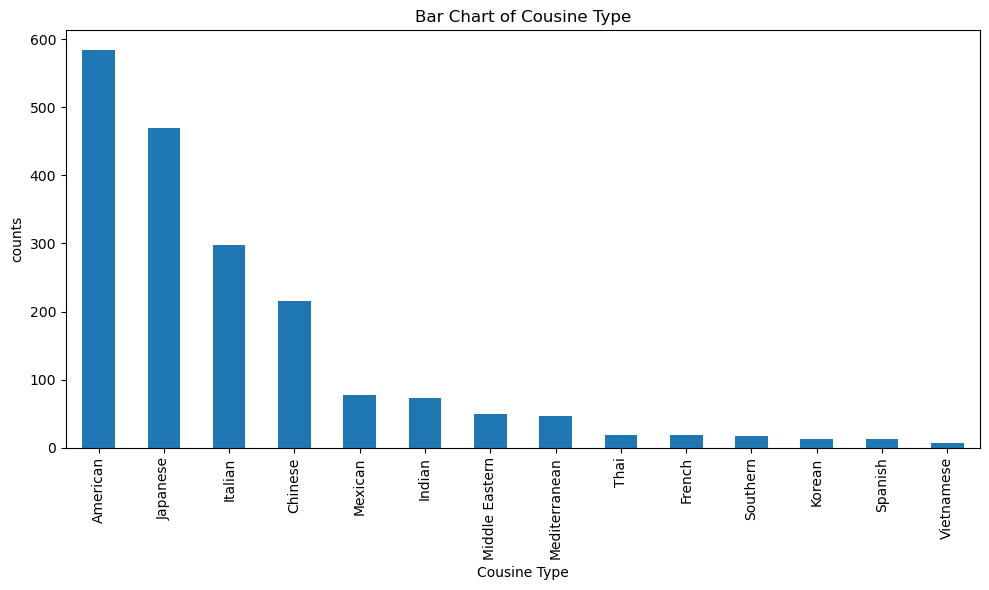

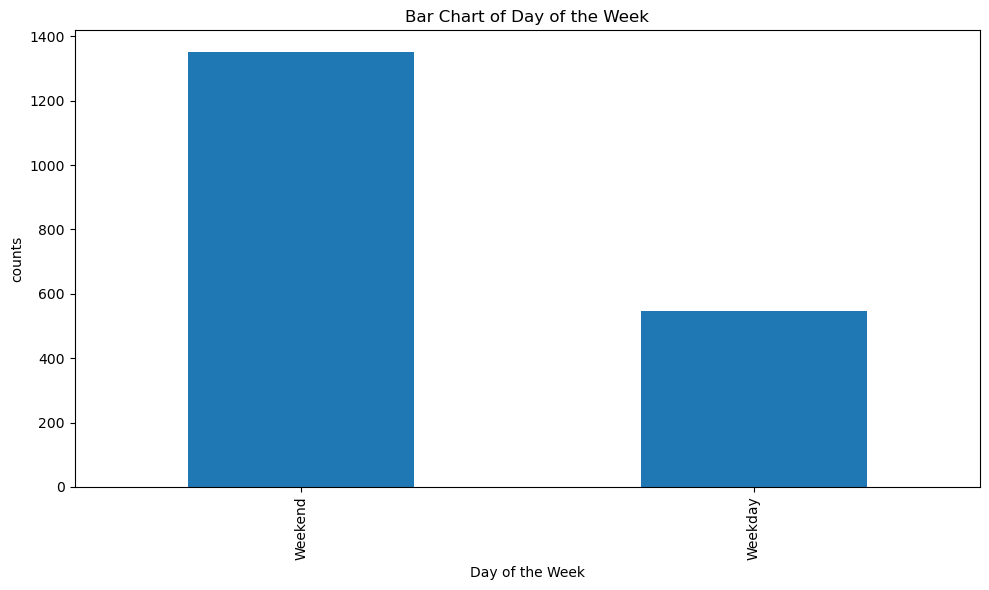

In [7]:
col_bar = ['Cousine Type', 'Day of the Week']

for col in col_bar:
    plt.figure(figsize= (10,6))
    food[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.tight_layout()

In [8]:
# unique restaurant names
unique_names = food['Restaurant Name'].nunique()

# value counts
value_name = food['Restaurant Name'].value_counts()

# total number of restaurant entries
count = food['Restaurant Name'].count()

print("Unique Restaurant Names:\n")
print(unique_names)

print("Number of Each Restaurant:\n")
print(value_name)

print("\nTotal Number of Restaurant Entries:", count)

Unique Restaurant Names:

178
Number of Each Restaurant:

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: Restaurant Name, Length: 178, dtype: int64

Total Number of Restaurant Entries: 1898


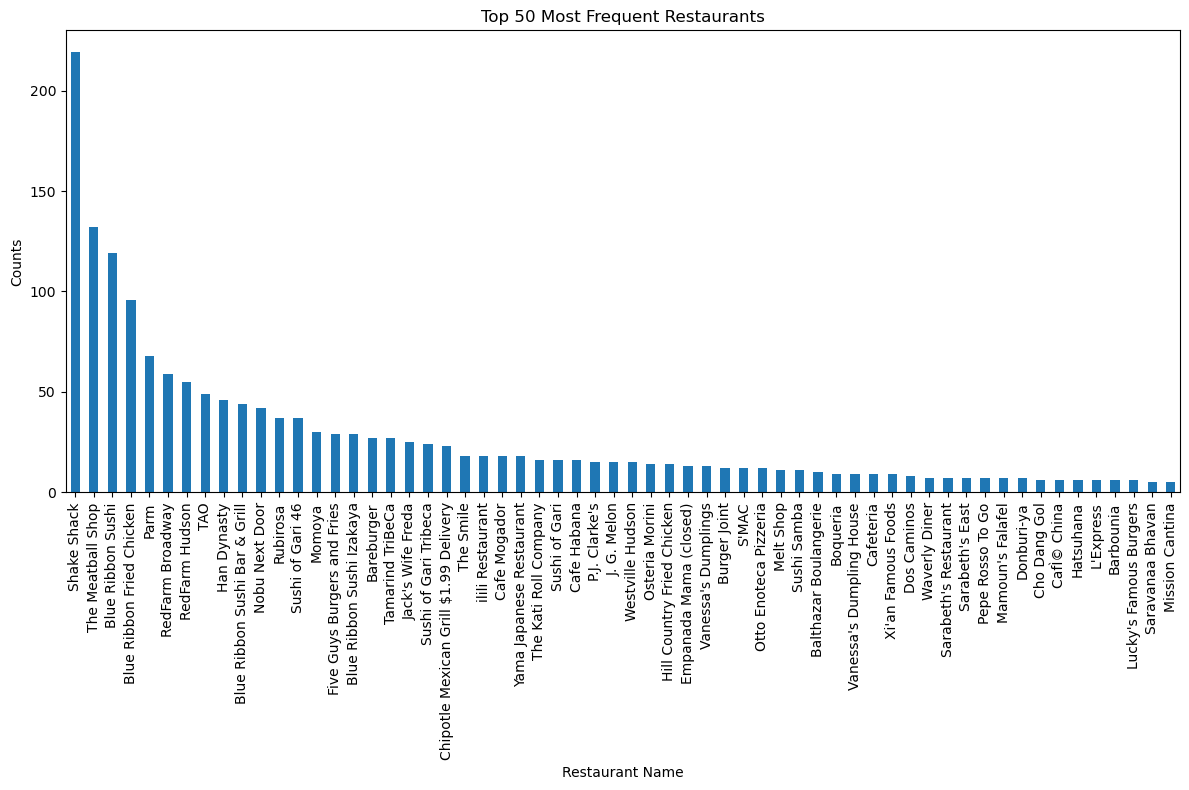

In [9]:
# top 50 restaurants 
top_50_restaurants = food['Restaurant Name'].value_counts().head(60)

# bar chart
plt.figure(figsize=(12,8))
top_50_restaurants.plot(kind = 'bar')
plt.title('Top 50 Most Frequent Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

### Visualizations of Numerical Variables

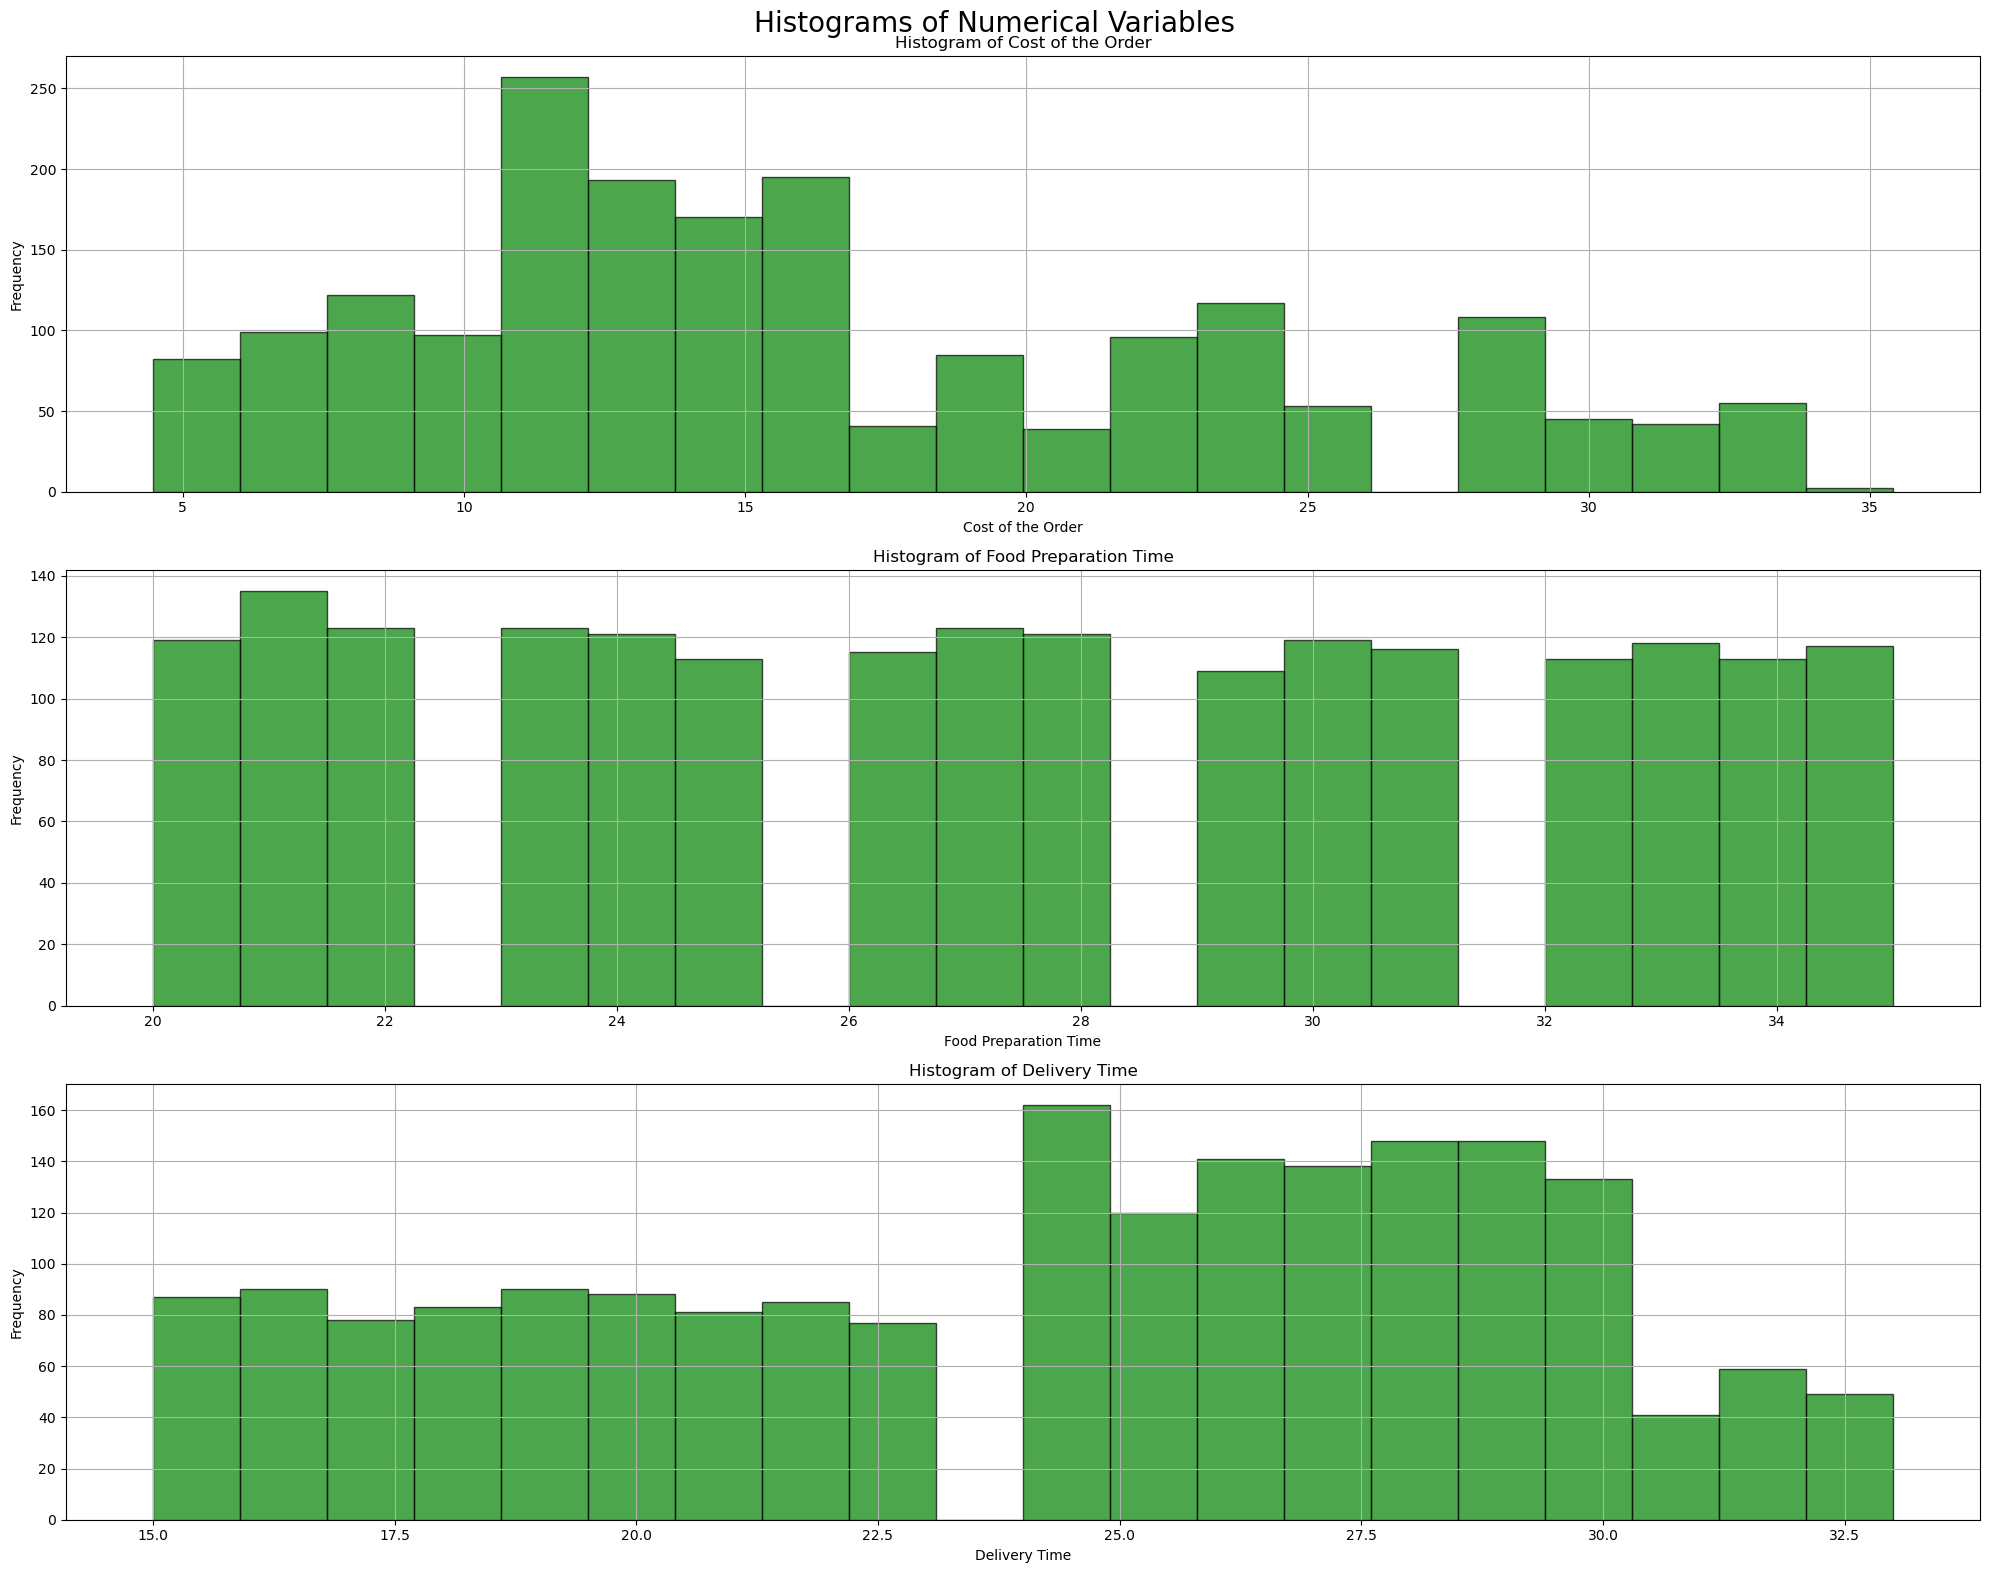

In [10]:
# histograms of numerical values
col_hist = ['Cost of the Order', 'Food Preparation Time', 'Delivery Time']

plt.figure(figsize=(20, 16))

# Loop through the numerical columns and create histograms
for i, col in enumerate(col_hist, 1):
    plt.subplot(3, 1, i)  # Create subplots in a 3x1 grid
    food[col].hist(bins=20, color='green', alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.suptitle('Histograms of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.show() 

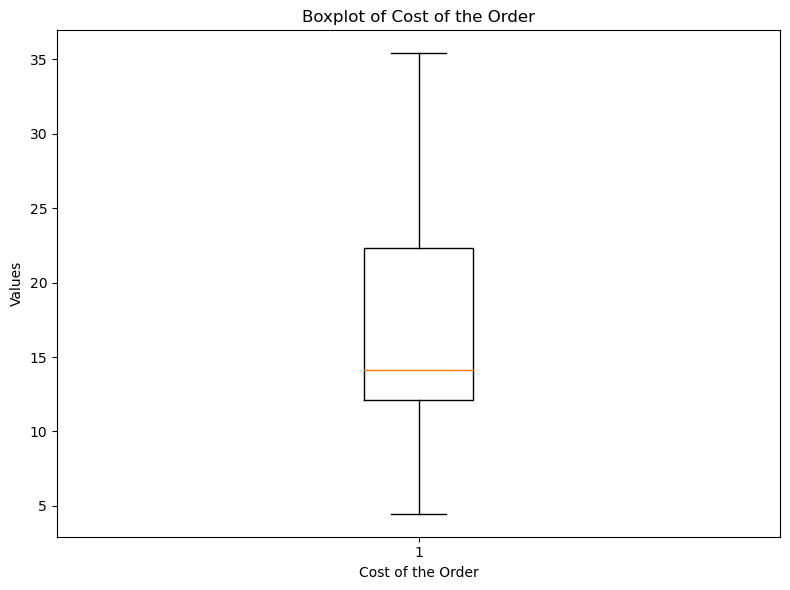

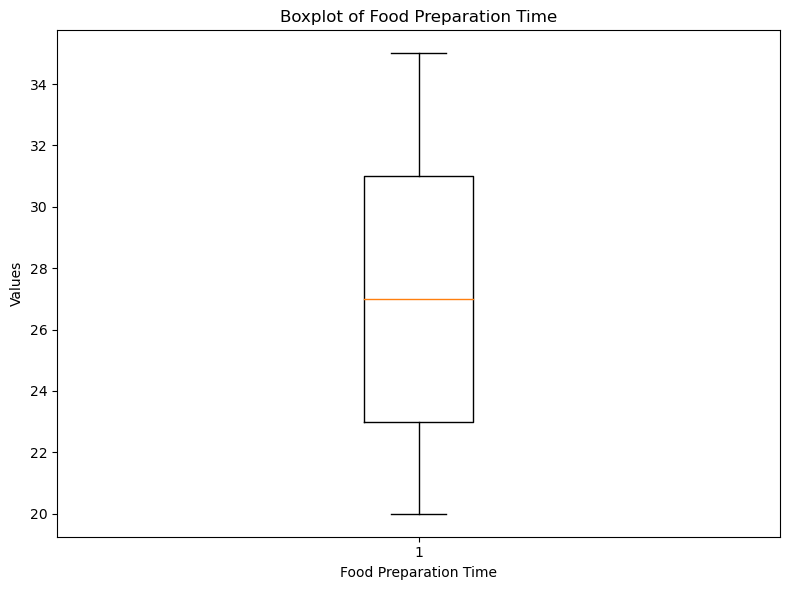

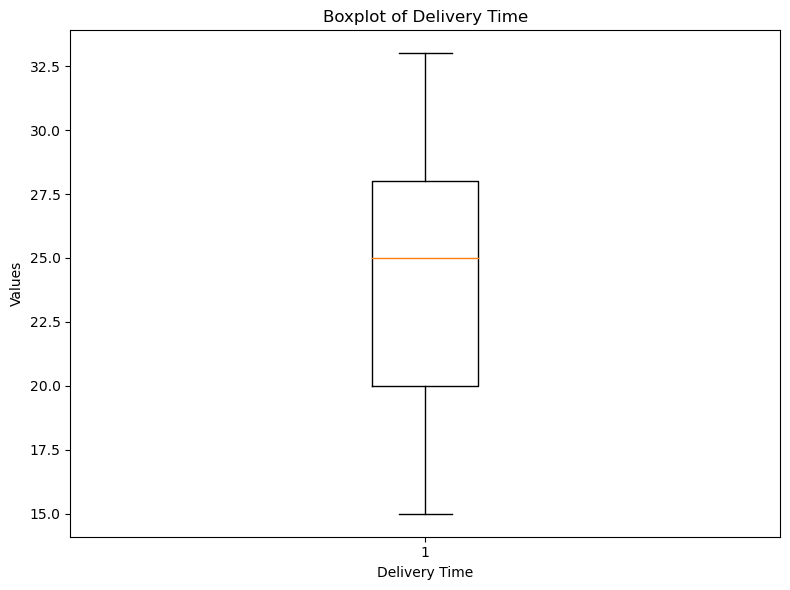

In [11]:
# boxplots of numerical values
col_box = ['Cost of the Order', 'Food Preparation Time', 'Delivery Time']

for col in col_box: 
    plt.figure(figsize=(8,6))
    plt.boxplot(food[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()

### Average Ratings for Each Restaraunt

In [24]:
# average rating for each restaraunt

average_ratings = food.groupby('Restaurant Name')['Rating'].mean().reset_index()

average_ratings.sort_values(by='Rating', ascending=False).head(50)

,Restaurant Name,Rating
0,'wichcraft,5.000000
120,Ravagh Persian Grill,5.000000
37,Chola Eclectic Indian Cuisine,5.000000
38,Chote Nawab,5.000000
82,Junoon,5.000000
137,Socarrat Paella Bar,5.000000
43,DespaÌ±a,5.000000
45,Dig Inn Seasonal Market,5.000000
133,Saravanaa Bhavan,5.000000
49,Donburi-ya,5.000000


### Correlation Heatmap

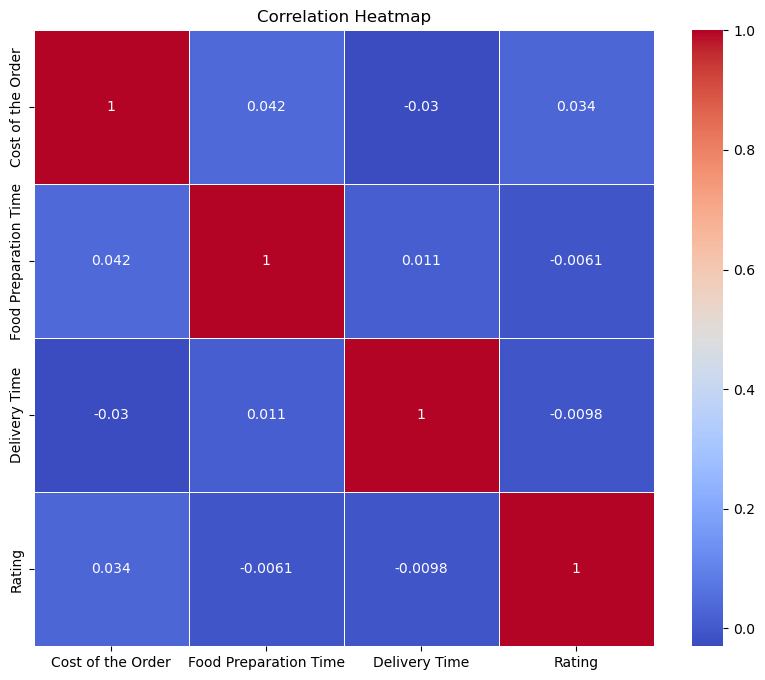

In [27]:
# correlation 
numerical_cols = ['Cost of the Order', 'Food Preparation Time', 'Delivery Time', 'Rating']

# calculate the correlation matrix
corr_matrix = food[numerical_cols].corr()

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()